<a href="https://colab.research.google.com/github/VascoBartolo/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 41.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 260 kB 65.4 MB/s 
     |████████████████████████████████| 4.4 MB 41.7 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641947 sha256=26163eb52b5069b1892e7be0f035b5f5b7325599268e8a083548a38a398229c1
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=4d0a3b2f73e0338f3bb9a77948ec7d4a28516fb0c14034da387ea9600e1916e3
  Sto

In [57]:
data = pd.read_csv("House-Price-Prediction-clean.csv")

In [58]:
data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


# Nova secção

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [60]:
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

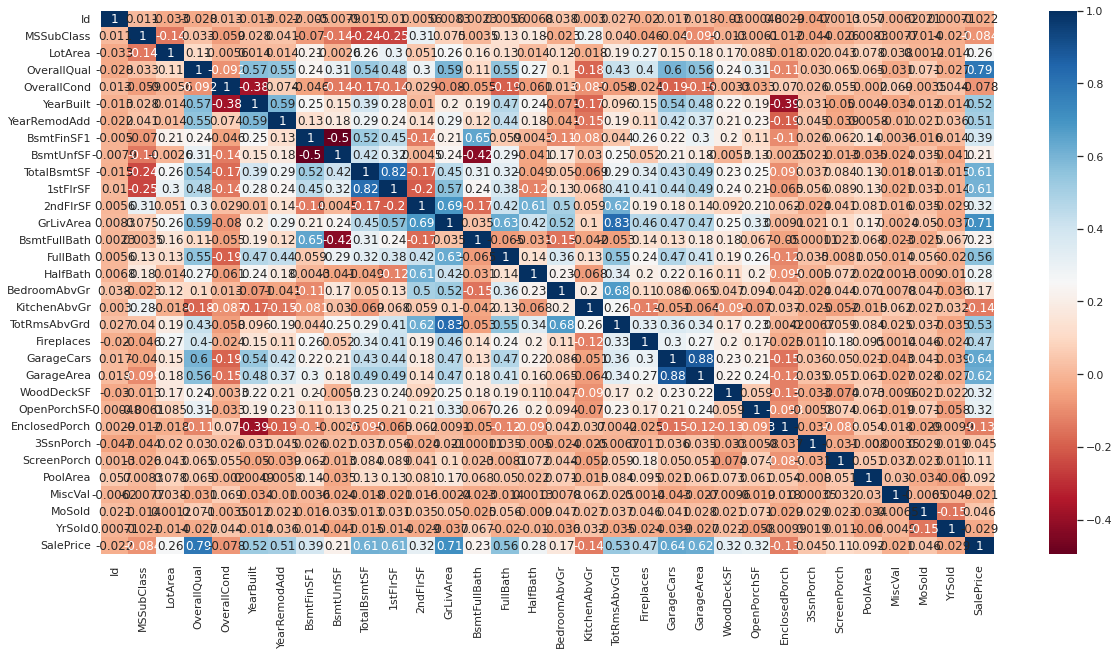

In [61]:
cor=data.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(cor, annot=True,cmap='RdBu');

Highest correlations are between area of living room, area of the house and number of bathrooms.

Regarding price the variables with higher correlation are areas of living rooms and area of the house.

In [62]:
x = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [63]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train.loc[:,["bedrooms", "bathrooms",	"sqft_living",	"sqft_lot",	"floors",	"sqft_above",	"sqft_basement",	"yr_built",	"house_age"]] = scaler.fit_transform(X_train[["bedrooms", "bathrooms",	"sqft_living",	"sqft_lot",	"floors",	"sqft_above",	"sqft_basement",	"yr_built",	"house_age"]])
#X_test.loc[:,["bedrooms", "bathrooms",	"sqft_living",	"sqft_lot",	"floors",	"sqft_above",	"sqft_basement",	"yr_built",	"house_age"]] = scaler.fit_transform(X_test[["bedrooms", "bathrooms",	"sqft_living",	"sqft_lot",	"floors",	"sqft_above",	"sqft_basement",	"yr_built",	"house_age"]])
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)
#X_test, y_test = ros.fit_resample(X_test, y_test)
#X_train, test = np.split(data.sample(frac=1), [int(0.75*len(data))])
#X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.20, random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  #scaler = StandardScaler()
  #X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [65]:
#train, X_train, y_train = scale_dataset(train, oversample=True)
#test, X_test, y_test = scale_dataset(test, oversample=False)

## Defining the algorithms we are going to use

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Fit models to training dataset
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

kn_reg = KNeighborsRegressor(n_neighbors=3)
kn_reg.fit(X_train, y_train)

regr_dt = DecisionTreeRegressor(random_state=1)
regr_dt.fit(X_train, y_train)

rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)

xgb_reg = xgb.XGBRegressor(random_state=1)
xgb_reg.fit(X_train, y_train)

[20:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

## Predicting inferences from training data

In [67]:
y_pred_train_lr = linear_reg.predict(X_train)
y_pred_train_kn = kn_reg.predict(X_train)
y_pred_train_dt = regr_dt.predict(X_train)
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_train_xgb = xgb_reg.predict(X_train)

## Check performance measures with test data

In [68]:
from sklearn.metrics import mean_squared_error
#Root mean squared error
rmse_lr=mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_kn=mean_squared_error(y_train, y_pred_train_kn, squared=False)
rmse_dt=mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_rf=mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_xgb=mean_squared_error(y_train, y_pred_train_xgb, squared=False)

from sklearn.metrics import mean_absolute_error
#Mean absolute error
mae_lr=mean_absolute_error(y_train, y_pred_train_lr)
mae_kn=mean_absolute_error(y_train, y_pred_train_kn)
mae_dt=mean_absolute_error(y_train, y_pred_train_dt)
mae_rf=mean_absolute_error(y_train, y_pred_train_rf)
mae_xgb=mean_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import mean_absolute_percentage_error
#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_kn=mean_absolute_percentage_error(y_train, y_pred_train_kn)
mape_dt=mean_absolute_percentage_error(y_train, y_pred_train_dt)
mape_rf=mean_absolute_percentage_error(y_train, y_pred_train_rf)
mape_xgb=mean_absolute_percentage_error(y_train, y_pred_train_xgb)

from sklearn.metrics import median_absolute_error
#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_train, y_pred_train_lr)
medae_kn=median_absolute_error(y_train, y_pred_train_kn)
medae_dt=median_absolute_error(y_train, y_pred_train_dt)
medae_rf=median_absolute_error(y_train, y_pred_train_rf)
medae_xgb=median_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import r2_score
#R² score, the coefficient of determination
r2_lr=r2_score(y_train, y_pred_train_lr)
r2_kn=r2_score(y_train, y_pred_train_kn)
r2_dt=r2_score(y_train, y_pred_train_dt)
r2_rf=r2_score(y_train, y_pred_train_rf)
r2_xgb=r2_score(y_train, y_pred_train_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,38687.150910,23907.954619,0.136025,16818.72142,0.826929
KNeighborsRegressor,4094.518586,590.582929,0.003781,0.00000,0.998061
DecisionTreeRegressor,0.000000,0.000000,0.000000,0.00000,1.000000
RandomForestRegressor,2082.263443,225.094470,0.001432,0.00000,0.999499
XGBoost,15032.938052,10957.259580,0.063251,7852.53125,0.973868


# For the test sample

In [69]:
y_pred_test_lr = linear_reg.predict(X_test)
y_pred_test_kn = kn_reg.predict(X_test)
y_pred_test_dt = regr_dt.predict(X_test)
y_pred_test_rf = rf_reg.predict(X_test)
y_pred_test_xgb = xgb_reg.predict(X_test)

In [70]:

#Root mean squared error
rmse_lr=mean_squared_error(y_test, y_pred_test_lr, squared=False)
rmse_kn=mean_squared_error(y_test, y_pred_test_kn, squared=False)
rmse_dt=mean_squared_error(y_test, y_pred_test_dt, squared=False)
rmse_rf=mean_squared_error(y_test, y_pred_test_rf, squared=False)
rmse_xgb=mean_squared_error(y_test, y_pred_test_xgb, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test, y_pred_test_lr)
mae_kn=mean_absolute_error(y_test, y_pred_test_kn)
mae_dt=mean_absolute_error(y_test, y_pred_test_dt)
mae_rf=mean_absolute_error(y_test, y_pred_test_rf)
mae_xgb=mean_absolute_error(y_test, y_pred_test_xgb)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test, y_pred_test_lr)
mape_kn=mean_absolute_percentage_error(y_test, y_pred_test_kn)
mape_dt=mean_absolute_percentage_error(y_test, y_pred_test_dt)
mape_rf=mean_absolute_percentage_error(y_test, y_pred_test_rf)
mape_xgb=mean_absolute_percentage_error(y_test, y_pred_test_xgb)

#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_test, y_pred_test_lr)
medae_kn=median_absolute_error(y_test, y_pred_test_kn)
medae_dt=median_absolute_error(y_test, y_pred_test_dt)
medae_rf=median_absolute_error(y_test, y_pred_test_rf)
medae_xgb=median_absolute_error(y_test, y_pred_test_xgb)

#R² score, the coefficient of determination
r2_lr=r2_score(y_test, y_pred_test_lr)
r2_kn=r2_score(y_test, y_pred_test_kn)
r2_dt=r2_score(y_test, y_pred_test_dt)
r2_rf=r2_score(y_test, y_pred_test_rf)
r2_xgb=r2_score(y_test, y_pred_test_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31068.118973,22186.574045,0.139146,17249.130573,0.864820
KNeighborsRegressor,56139.875161,36586.513699,0.226403,24250.000000,0.558606
DecisionTreeRegressor,50745.274496,29889.456621,0.180264,20388.000000,0.639359
RandomForestRegressor,28393.752931,18905.198288,0.121467,12578.085000,0.887091
XGBoost,24955.607598,16565.700601,0.102997,11804.335938,0.912779


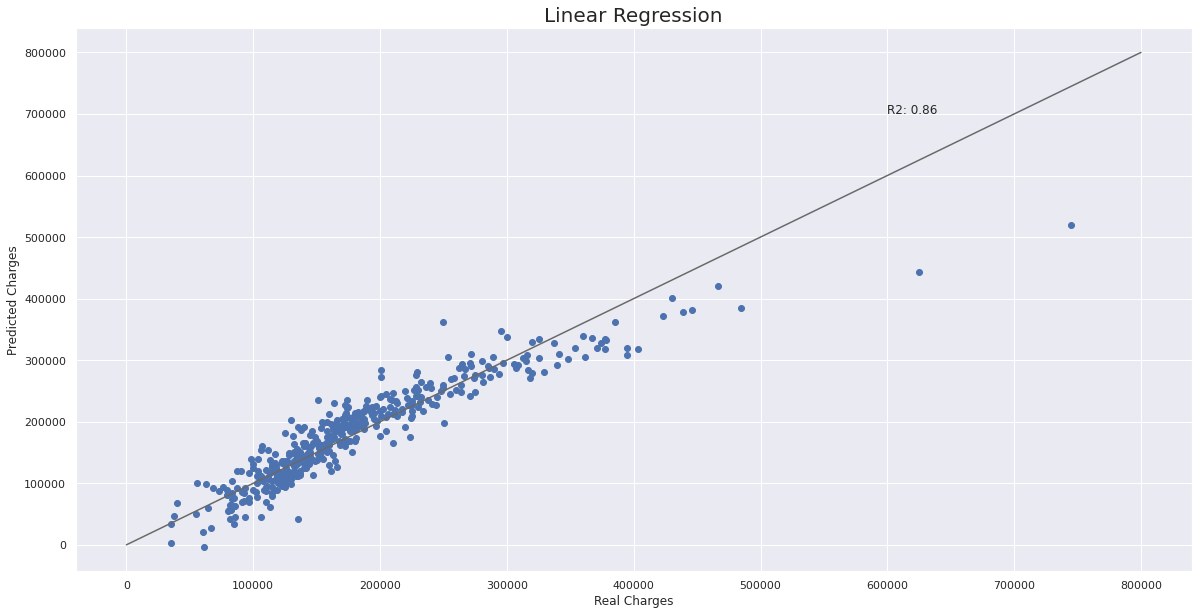

In [71]:
plt.scatter(y_test, y_pred_test_lr)
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [600000, 700000])
plt.title('Linear Regression', fontsize=20)
plt.show()

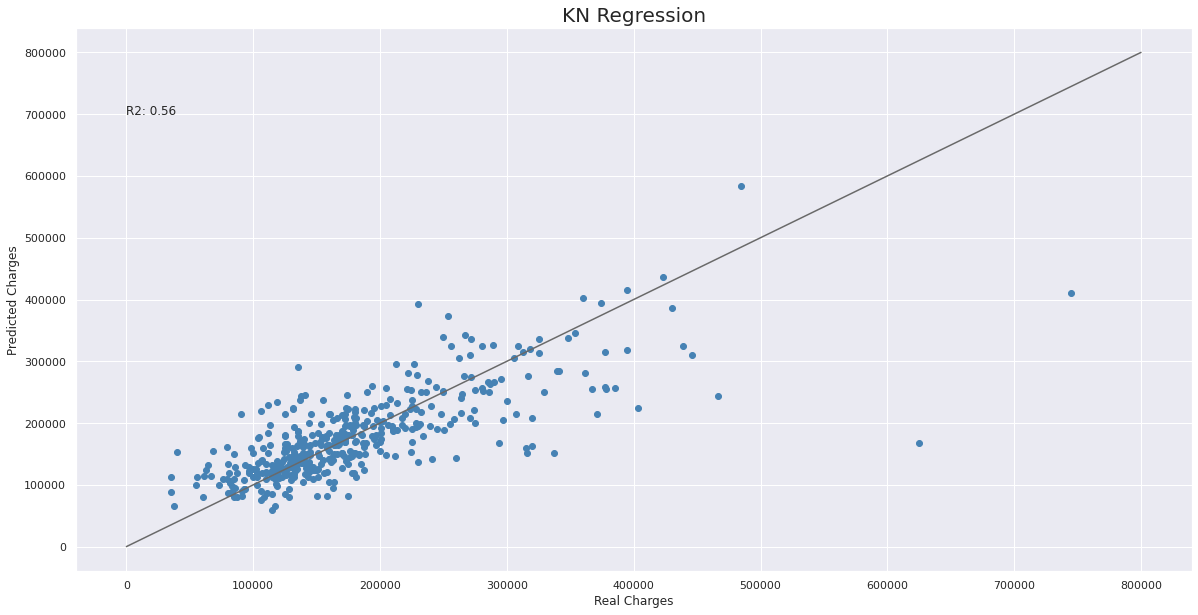

In [72]:
plt.scatter(y_test, y_pred_test_kn, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_kn,2)), [0,600000], [0,700000])
plt.title('KN Regression', fontsize=20)
plt.show()

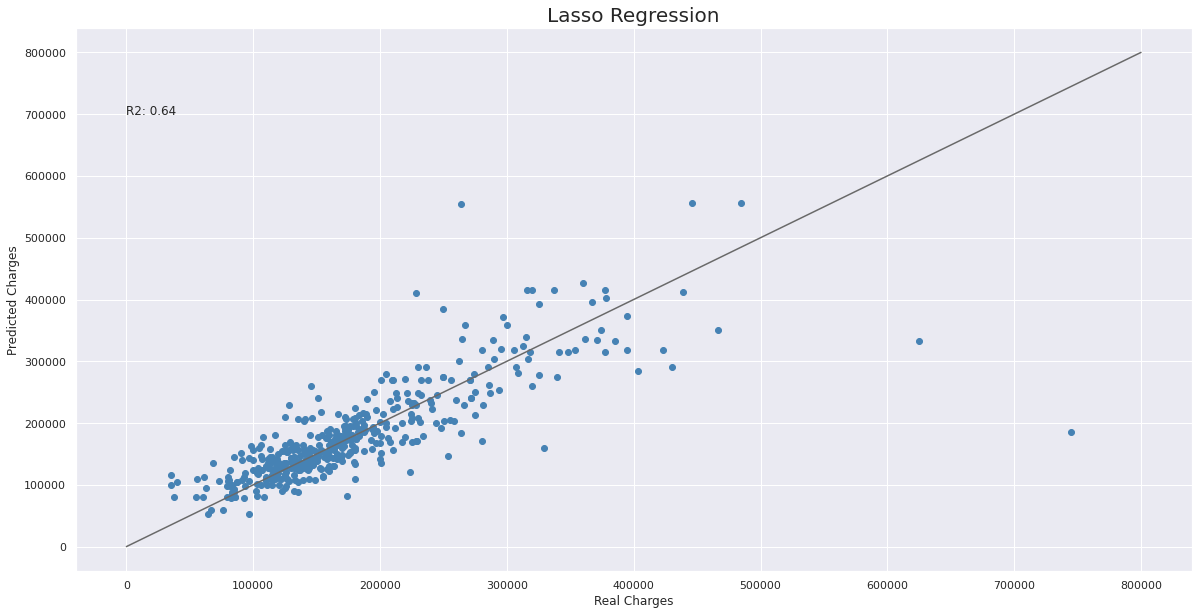

In [73]:
plt.scatter(y_test, y_pred_test_dt, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_dt,2)), [0,600000], [0,700000])
plt.title('Lasso Regression', fontsize=20)
plt.show()

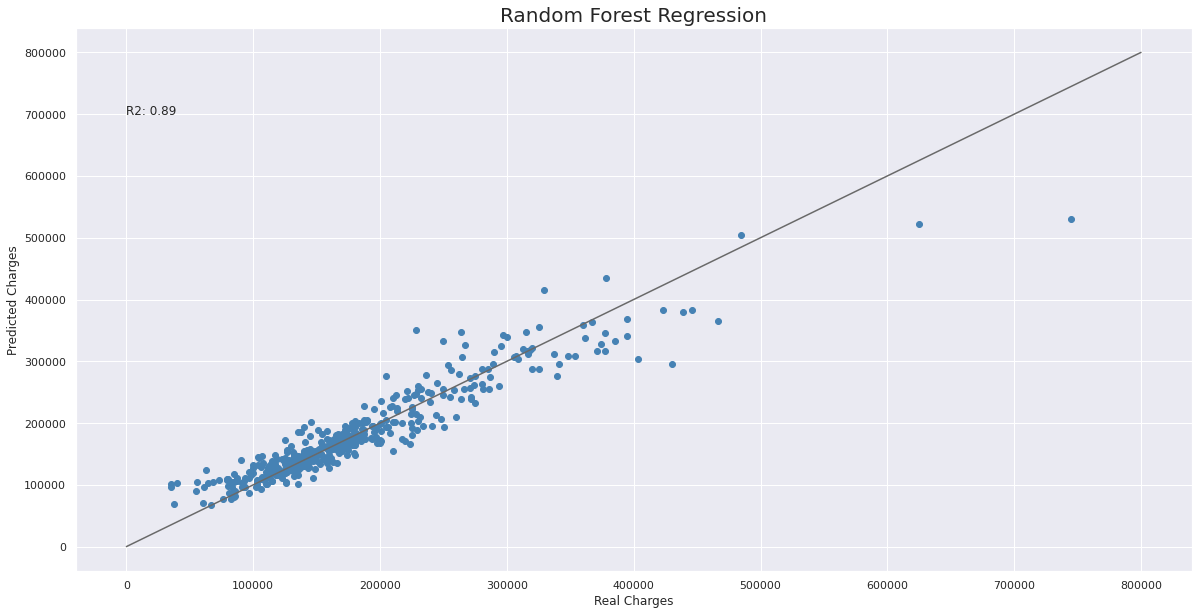

In [74]:
plt.scatter(y_test, y_pred_test_rf, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_rf,2)), [0,600000], [0,700000])
plt.title('Random Forest Regression', fontsize=20)
plt.show()

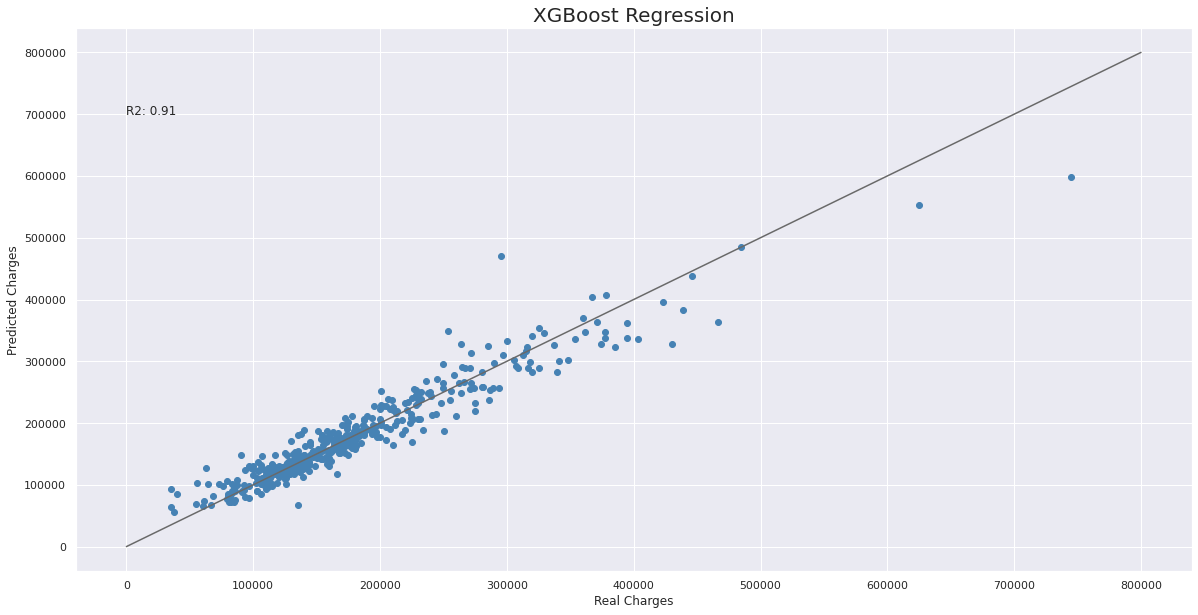

In [75]:
plt.scatter(y_test, y_pred_test_xgb, c='steelblue')
plt.plot([0,800000], [0,800000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_xgb,2)), [0,600000], [0,700000])
plt.title('XGBoost Regression', fontsize=20)
plt.show()

In [338]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Initialze the estimators
#regr_lr = LinearRegression()
#regr_kn = KNeighborsRegressor()
#regr_dt = DecisionTreeRegressor(random_state=0)
#regr_rf = RandomForestRegressor(random_state=0)
#regr_xgb = xgb.XGBRegressor(random_state=0)


# Initiaze the hyperparameters for each dictionary
param_lr = {}
param_lr['regressor'] = [linear_reg]

param_rf = {}
param_rf['regressor__n_estimators'] = [5, 10, 50, 100]
param_rf['regressor__max_depth'] = [1, 5, 10, 20]
param_rf['regressor'] = [rf_reg]

param_kn = {}
param_kn['regressor__n_neighbors'] = [1,3,5,7,10]
param_kn['regressor__weights'] = ['uniform', 'distance']
param_kn['regressor'] = [kn_reg]

param_dt = {}
param_dt['regressor__max_depth'] = [5,10,25,None]
param_dt['regressor__min_samples_split'] = [2,5,10]
param_dt['regressor'] = [regr_dt]

param_xgb = {}
param_xgb['regressor__max_depth'] = [3,5,10,12,15]
param_xgb['regressor__eta'] = [0.1, 0.2, 0.4]
param_xgb['regressor__subsample']=[0.5, 1]
param_xgb['regressor__colsample_bytree'] = [0.3,0.5, 1]
param_xgb['regressor__num_parallel_tree'] = [1, 3,5, 7,10]
param_xgb['regressor'] = [xgb_reg]

pipeline = Pipeline([('regressor', DummyRegressor)])
params = [param_lr, param_rf, param_kn, param_dt, param_xgb]

# Train the grid search model
gs = GridSearchCV(pipeline,
                  params, 
                  cv = 5, 
                  n_jobs = 1, 
                  verbose = 0, 
                  return_train_score=True, 
                  scoring='neg_root_mean_squared_error')

best_model = gs.fit(X_train, y_train)

# See which model was the best
best_model.best_estimator_.get_params()['regressor']

[10:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(eta=0.1, max_depth=15, num_parallel_tree=1, random_state=1)

In [339]:
best_model.score(X_train, y_train)

-31.271773251920383

In [340]:
# Check the best model performance 
y_pred = best_model.predict(X_test)
#mse_bestmodel=mean_squared_error(y_test, y_pred)
rmse_bestmodel=mean_squared_error(y_test, y_pred, squared=False)
mae_bestmodel=mean_absolute_error(y_test, y_pred)
mape_bestmodel=mean_absolute_percentage_error(y_test, y_pred)
medae_bestmodel=median_absolute_error(y_test, y_pred)
r2_bestmodel=r2_score(y_test, y_pred)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_bestmodel],
    'MAE': [mae_lr, mae_kn, mae_dt ,mae_rf, mae_xgb, mae_bestmodel],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_bestmodel],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_bestmodel],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_bestmodel],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "Best Model"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31556.311321,22439.449786,0.140663,17685.012565,0.860538
KNeighborsRegressor,56082.698047,36828.916286,0.227432,24833.333333,0.559505
DecisionTreeRegressor,36627.891999,25760.139269,0.160084,18600.000000,0.812108
RandomForestRegressor,26723.679152,18586.037192,0.118809,12727.820000,0.899983
XGBoost,24201.142966,16308.573050,0.102811,11230.554688,0.917973
Best Model,25636.600478,18487.896886,0.117837,13458.968750,0.907954


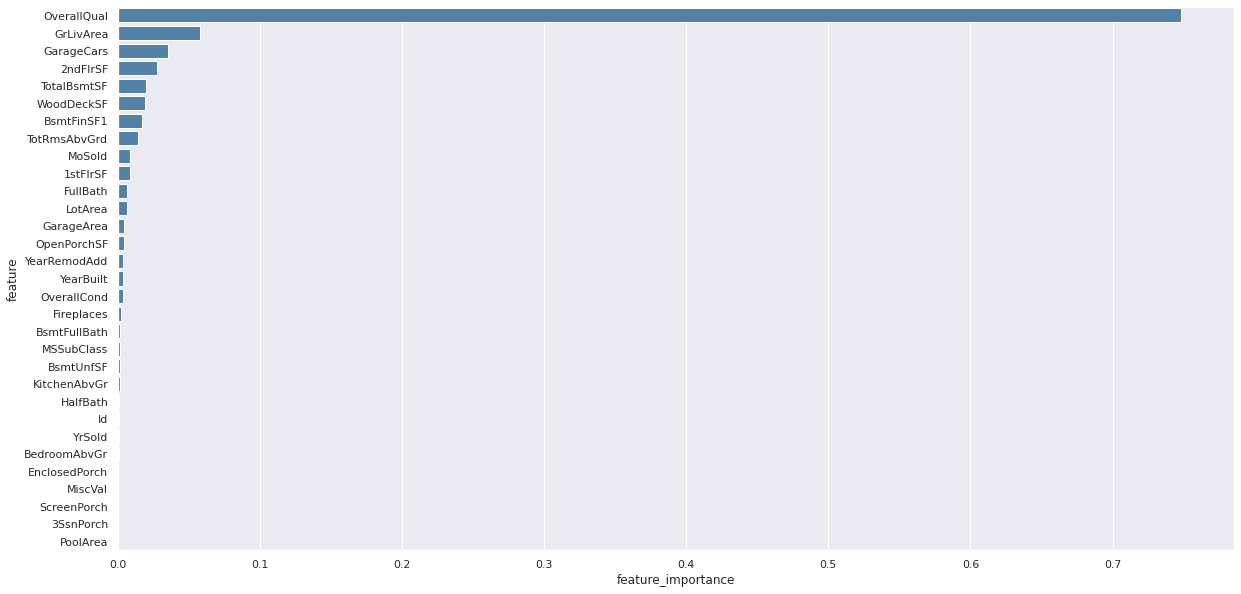

In [341]:
data_feat = pd.DataFrame({'feature': X_test.columns,
                        'feature_importance': best_model.best_estimator_.named_steps['regressor'].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns_feats = sns.barplot(x='feature_importance', y='feature', data=data_feat, orient='h', color='steelblue')

# Deep Learning 

In [114]:
x = data.drop(['SalePrice', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'EnclosedPorch', 'BedroomAbvGr', 'YrSold', 'Id', 'HalfBath', 'KitchenAbvGr', 'BsmtUnfSF', 'MSSubClass', 'BsmtFullBath', 'Fireplaces'],axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [115]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K # To solve a current problem with SHAP library
tf.compat.v1.disable_eager_execution() # To solve a current problem with SHAP library

In [117]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [118]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Using RELU for activation function of the neurons

In [124]:
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Add an input layer
model.add(Dense(12, activation='relu', input_shape=(17,)))

# Add one hidden layer
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(6, activation='relu'))

# Add one hidden layer 
model.add(Dense(3, activation='relu'))

# Add an output layer 
model.add(Dense(1))

In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 12)                216       
                                                                 
 dense_50 (Dense)            (None, 10)                130       
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dense_52 (Dense)            (None, 8)                 88        
                                                                 
 dense_53 (Dense)            (None, 6)                 54        
                                                                 
 dense_54 (Dense)            (None, 3)                 21        
                                                                 
 dense_55 (Dense)            (None, 1)                

In [126]:
# List all weight tensors 
model.get_weights()

[array([[-0.40082663, -0.09851298,  0.0432578 , -0.17229506,  0.25943458,
          0.17834258, -0.44353807,  0.05579412,  0.3028621 , -0.32013288,
          0.16145486, -0.31842768],
        [-0.11688527, -0.35280442,  0.0818783 ,  0.28681237,  0.24919629,
         -0.1377782 ,  0.2709924 ,  0.40900016,  0.28188783, -0.3177566 ,
         -0.09600037,  0.24644685],
        [ 0.07879984, -0.04249305, -0.19426411, -0.18719816,  0.36190313,
         -0.1909093 , -0.00428843,  0.42663056, -0.41595712,  0.05127829,
          0.18269813,  0.14725035],
        [ 0.11793524, -0.42950377,  0.08180219, -0.0236851 , -0.08648166,
          0.34894913,  0.23277587, -0.31065387,  0.00611076,  0.3630008 ,
         -0.4349708 , -0.33695158],
        [ 0.29010886,  0.37253016, -0.02024746,  0.42498356,  0.04761887,
          0.07180059, -0.42336935, -0.00169653,  0.2064234 ,  0.44509095,
          0.27517432, -0.3487932 ],
        [ 0.41810006,  0.13895363, -0.00378481, -0.4386663 , -0.22537707,
      

In [127]:
# Config the model with the loss, optimizer and metric
model.compile(loss="mse",
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [128]:
# Train the model
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=12, batch_size=5, verbose=1, validation_data=(X_val,y_val))


Train on 6264 samples, validate on 1566 samples
Epoch 1/12
6180/6264 [============================>.] - ETA: 0s - loss: 16991119576.2977 - root_mean_squared_error: 130349.9297

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


6264/6264 [==============================] - 3s 514us/sample - loss: 16808796297.8621 - root_mean_squared_error: 129648.6797 - val_loss: 3641761162.6903 - val_root_mean_squared_error: 60347.0117
Epoch 2/12
6264/6264 [==============================] - 2s 330us/sample - loss: 3135545907.5262 - root_mean_squared_error: 55995.9258 - val_loss: 3173133644.5287 - val_root_mean_squared_error: 56330.5703
Epoch 3/12
6264/6264 [==============================] - 2s 347us/sample - loss: 2663151990.5996 - root_mean_squared_error: 51605.7188 - val_loss: 2766022342.8557 - val_root_mean_squared_error: 52592.9883
Epoch 4/12
6264/6264 [==============================] - 2s 339us/sample - loss: 2314138251.6437 - root_mean_squared_error: 48105.4922 - val_loss: 2388979029.4638 - val_root_mean_squared_error: 48877.1875
Epoch 5/12
6264/6264 [==============================] - 2s 333us/sample - loss: 2083668894.2063 - root_mean_squared_error: 45647.2148 - val_loss: 2250479149.5837 - val_root_mean_squared_error: 

Text(0, 0.5, 'Validation Loss')

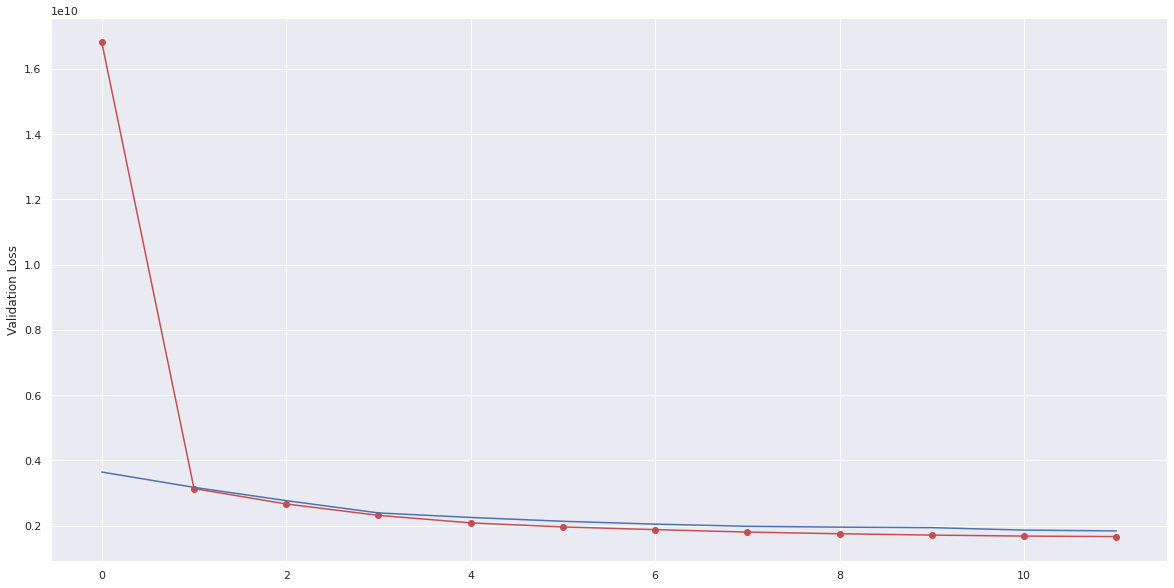

In [129]:
ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.plot(history.epoch, history.history["val_loss"])
ax.set_ylabel('Validation Loss')

In [130]:
# Predict for the test set
y_pred_DL = model.predict(X_test)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [131]:
#mse_bestmodel=mean_squared_error(y_test, y_pred)
rmse_DL=mean_squared_error(y_test, y_pred_DL, squared=False)
mae_DL=mean_absolute_error(y_test, y_pred_DL)
mape_DL=mean_absolute_percentage_error(y_test, y_pred_DL)
medae_DL=median_absolute_error(y_test, y_pred_DL)
r2_DL=r2_score(y_test, y_pred_DL)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_DL ],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb, mae_DL],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_DL],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_DL],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_DL],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "DL"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,31068.118973,22186.574045,0.139146,17249.130573,0.864820
KNeighborsRegressor,56139.875161,36586.513699,0.226403,24250.000000,0.558606
DecisionTreeRegressor,50745.274496,29889.456621,0.180264,20388.000000,0.639359
RandomForestRegressor,28393.752931,18905.198288,0.121467,12578.085000,0.887091
XGBoost,24955.607598,16565.700601,0.102997,11804.335938,0.912779
DL,33478.669818,23073.543212,0.143871,17227.437500,0.843029


In [132]:
# Feature importance
import shap

# If there are too many samples in X_train, it will take a lot of computational resources to get the explainer. 
# We can sample data to use lesser data.
# explainer = shap.DeepExplainer(model,  shap.sample(X_train,100))
explainer = shap.DeepExplainer(model,  X_train)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=x.columns)
#Ignore warnings for now

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


AssertionError: ignored

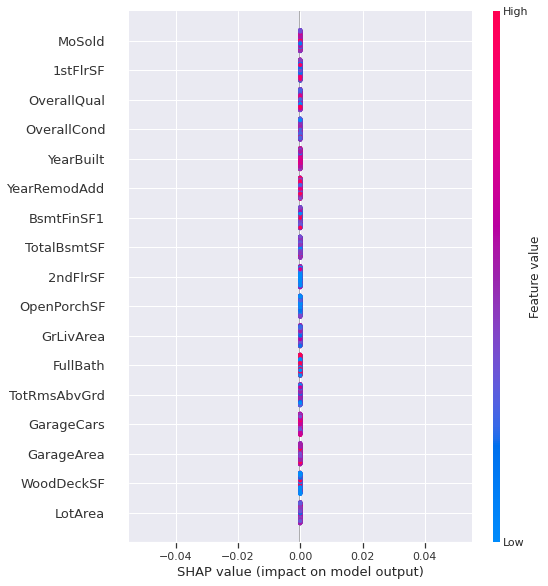

In [133]:
shap.summary_plot(shap_values[0], X_test, feature_names=x.columns)